In [87]:
%matplotlib inline

# to set the path for importing HADES modules
import sys
sys.path.append("../source/")

import numpy as np
import matplotlib.pyplot as plt

from hades_input import hades_input
from hades_location import hades_location

# Ridgecrest example to demonstrate how HADES works

HADES works via the principle of inter-event distance estimation.


[insert image here]




The data used for this tutorial is the _Ridgecrest 2019_ afterschock sequence after the Mw 6.4 earthquake, measured at two stations: ***WBS*** and ***WMF***, at a distance of () km and () km. The data is taken from: [_REFERENCE_]

In [88]:
# First we load our data
data_path = './data/'                            


input_file_4 = 'inputs/ridgecrest_gji_4.dat'       # This contains the event times and arrival time picks
input_file_8 = 'inputs/ridgecrest_gji_8.dat'       # This contains the event times and arrival time picks
input_file_15 = 'inputs/ridgecrest_gji_15.dat'       # This contains the event times and arrival time picks

station_file = 'inputs/stations_ridge.txt'     # This contains the station locations


We need the P and S-wave velocities as inputs to estimate the inter-event distance. These are homogeneous velocities, but the velocity between events is not expected to vary very much.

In [89]:
# Homogeneous velocity estimates for the Ridgecrest example
Vp = 6000
Vs = Vp/1.73

# Stations: pick one or preferably two stations out of your station list. In this case
# we only have two stations, so that is easy
stations = ['WBS', 'WMF']

In [4]:
# Create an input object with data loaded 

hobj_15 = hades_input(
    data_path = data_path,          # the general path to the data
    event_file = input_file_15,        # the input event file path
    station_file = station_file,    # the station file path
    sta_select = stations           # your two stations
)


## Now comes an important choice: relative or absolute mode? 

>Depending on how many locations you have already and the quality/uncertainty on those locations, you can choose whether you want to use either:

- One master event: HADES finds the events relative to one another on basis of a pre-defined estimated aperture between the master event and thee other chosen events. And then locates absolutely on basis of this master event. It then rotates the cluster on basis of the measured (ts-tp)
- Four master events: HADES constructs a coordinate system on basis of these four events, does not need to rotate, and finds the absolute location relative to these four absolutelly located master events.
- .>4 master events: same story, absolute cluster and cluster shape are constrained by the amount of master events. If your master events are very uncertain, maybe not the best way to go because you could introduce a lot of bias.

### We first choose absolute mode with 15
 reference events (original HADES)

In [5]:
# First we compute the relative distances
hobj_15.distance_calculation(Vp,Vs,stations)

# And think of a filename to deposit our results in
out_file = 'ridgecrest_twostations_15'

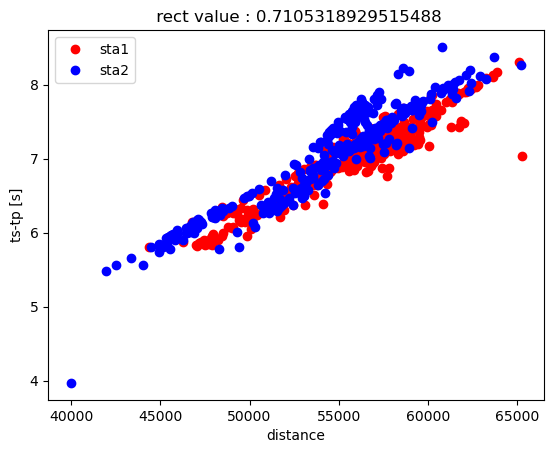

'Location process completed, number of located events: 320 '

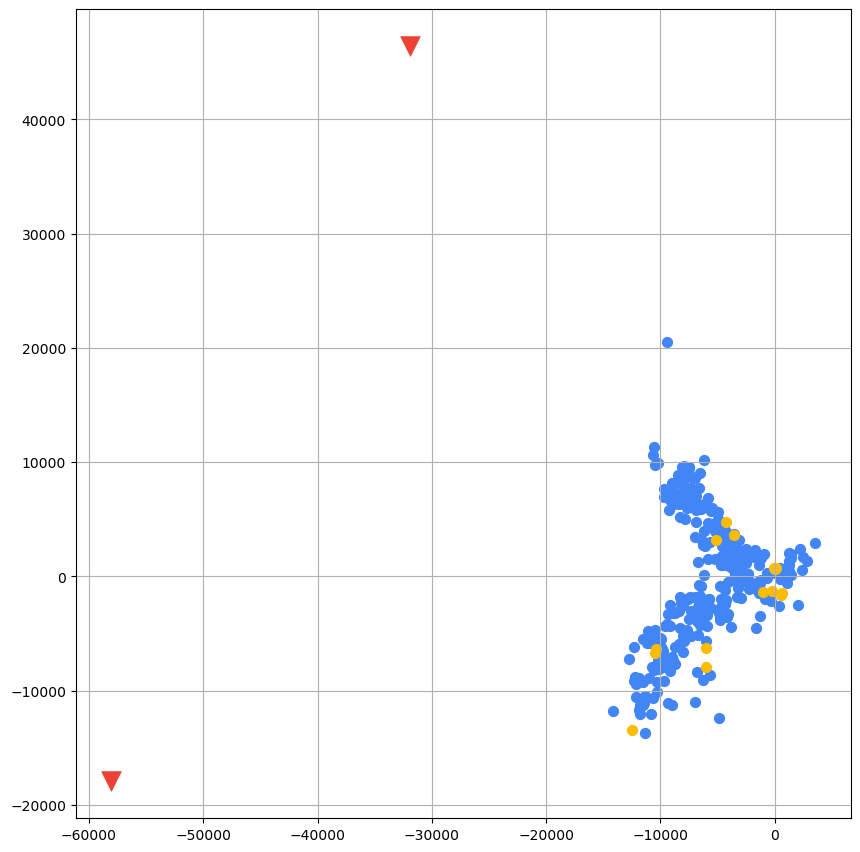

In [6]:
# And then we do absolute locations. First make a location instance:
hloc_15 = hades_location(input_obj=hobj_15, output_path='./data/outputs/', output_frame='cart')

# and locate the events:
hloc_15.location(out_file, mode='abs', plot=True)

### Now we try 8 master events
Original HADES

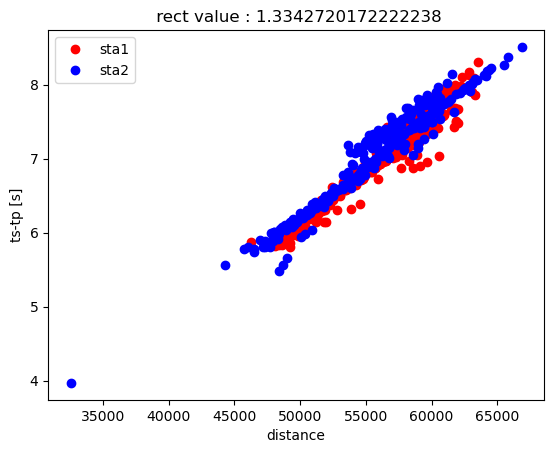

'Location process completed, number of located events: 320 '

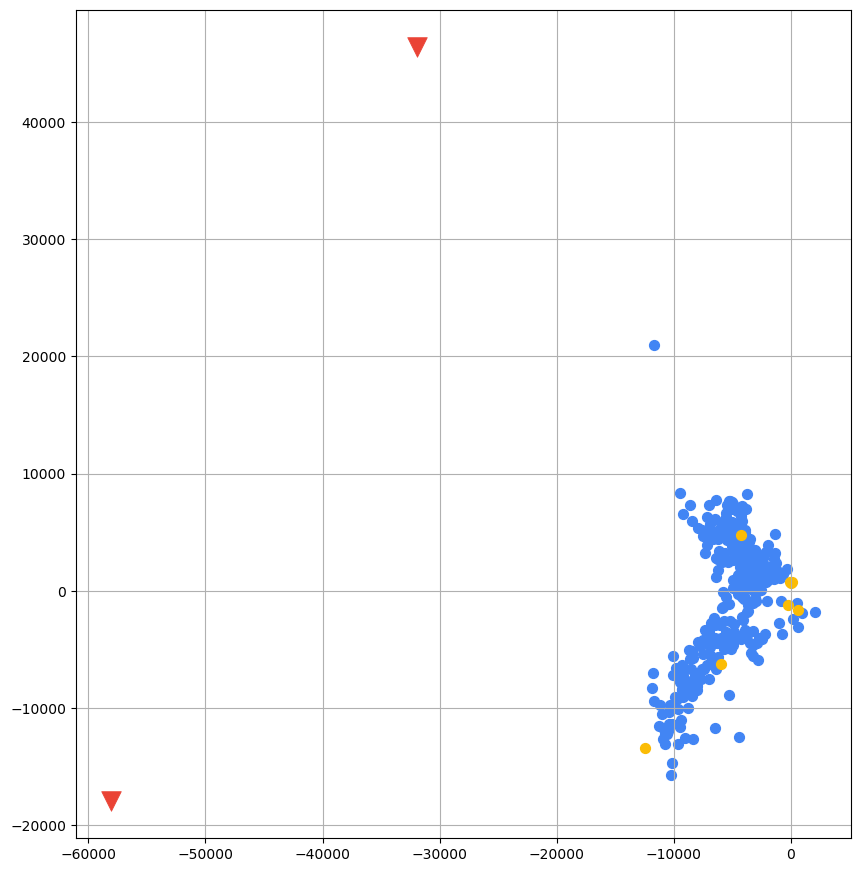

In [7]:
# Create an input object again with data loaded 
hobj_8 = hades_input(
    data_path = data_path,          # the general path to the data
    event_file = input_file_8,        # the input event file path
    station_file = station_file,    # the station file path
    sta_select = stations           # your two stations
)

# First we compute the relative distances
hobj_8.distance_calculation(Vp,Vs,stations)

# And think of a filename to deposit our results in
out_file = 'ridgecrest_twostations_8'

# And then we do absolute locations. First make a location instance:
hloc_8 = hades_location(input_obj=hobj_8, output_path='./data/outputs/', output_frame='cart')

# and locate the events:
hloc_8.location(out_file, mode='abs', plot=True)

### With 4 master events
The minimum number of events for the original HADES

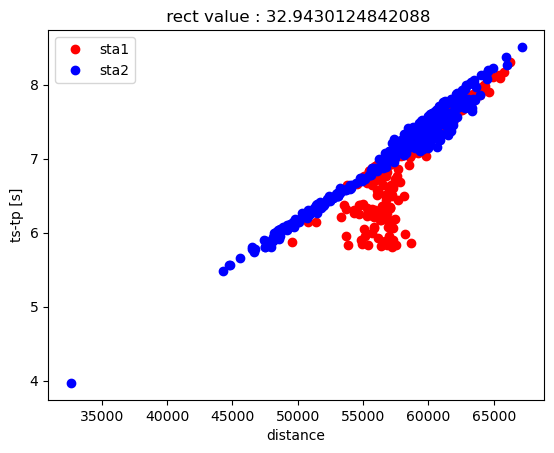

'Location process completed, number of located events: 320 '

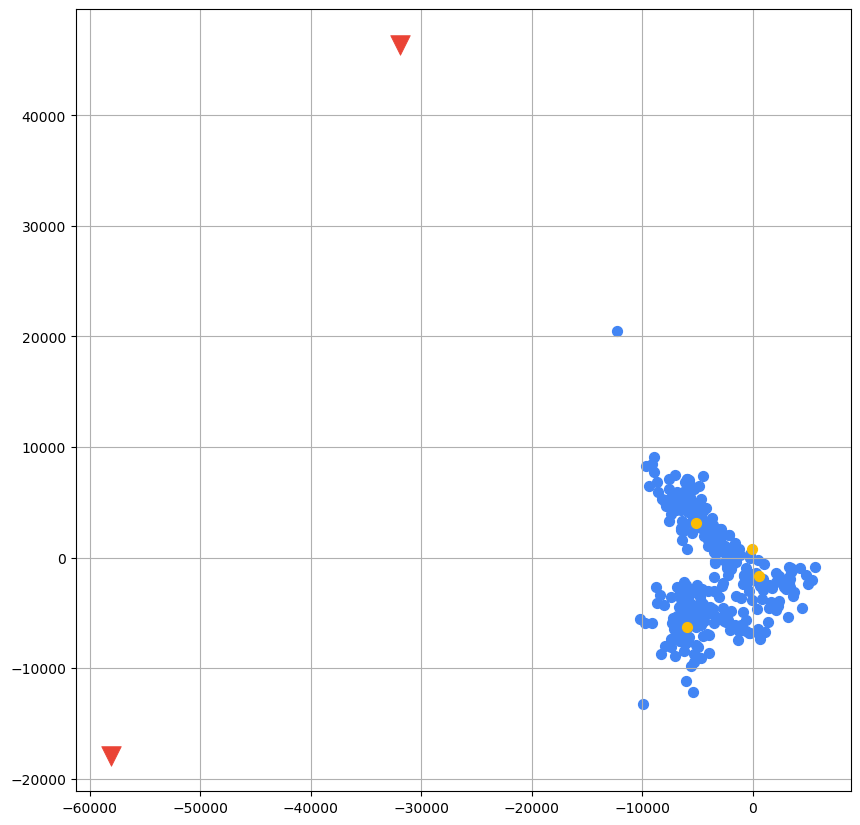

In [8]:
# Create an input object again with data loaded 
hobj_4 = hades_input(
    data_path = data_path,          # the general path to the data
    event_file = input_file_4,        # the input event file path
    station_file = station_file,    # the station file path
    sta_select = stations           # your two stations
)

# First we compute the relative distances
hobj_4.distance_calculation(Vp,Vs,stations)

# And think of a filename to deposit our results in
out_file = 'ridgecrest_twostations_4'

# And then we do absolute locations. First make a location instance:
hloc_4 = hades_location(input_obj=hobj_4, output_path='./data/outputs/', output_frame='cart')

# and locate the events:
hloc_4.location(out_file, mode='abs', plot=True)

### And now we switch to 1 master event

This means that we switch to relative mode. For relative mode one needs 4 reference events flagged in the input file (#R), but only the first will be used for the relative distance calculation, so only the first one of these needs an absolute location in the input file, the other oens will be ignored. You ***do*** need to estimate the aperture between these events.

'Location process completed, number of located events: 320 '

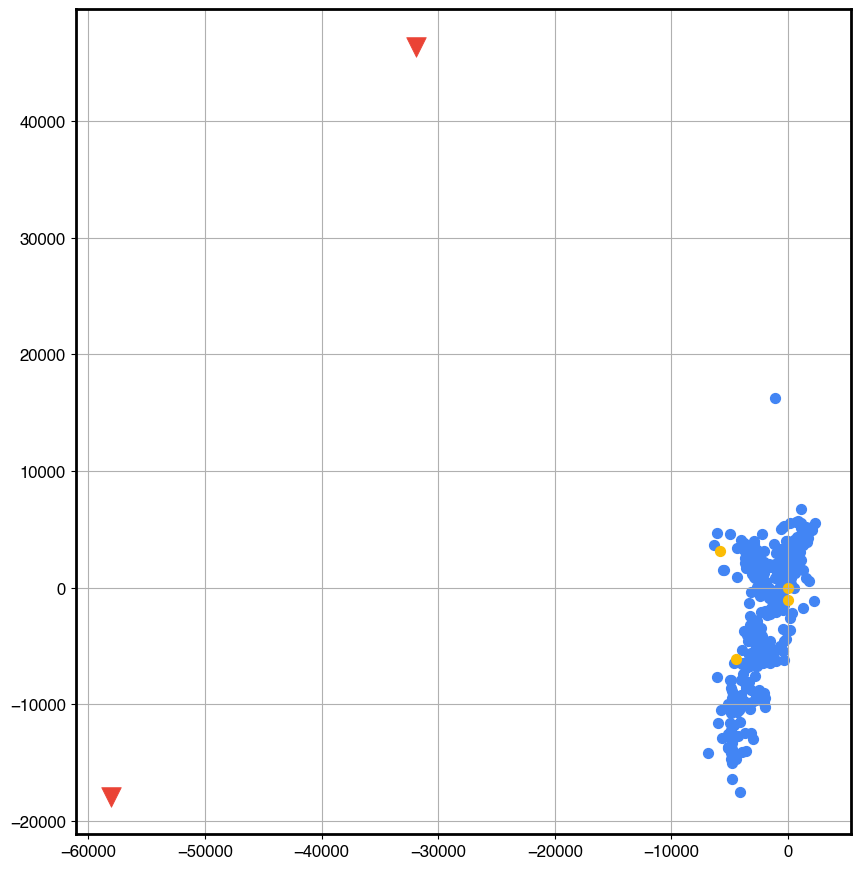

In [90]:
# Create an input object with data loaded 

hobj_1 = hades_input(
    data_path = data_path,          # the general path to the data
    event_file = input_file_4,        # the input event file path
    station_file = station_file,    # the station file path
    sta_select = stations           # your two stations
)

# And think of a filename to deposit our results in
out_file = 'ridgecrest_twostations_1'

hobj_1.relative_frame(Vp,Vs,stations,y_ref=-1,z_ref=1,fixed_depth=-8)
hobj_1.distance_calculation(Vp,Vs,stations)
hloc_1=hades_location(input_obj=hobj_1, output_path='./data/outputs/', output_frame='cart')
hloc_1.location(out_file, mode='rel', plot=True)

## Comparison

Let's plot our results against the true locations

In [10]:
import matplotlib as mpl

# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 2

plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['axes.labelsize'] = 12


cm = 1/2.54  # centimeters in inches

In [11]:
import pandas as pd
from LatLongUTMconversion import LLtoUTM, UTMtoLL

hypoDD_locs = np.loadtxt('./data/inputs/hypoDD_locs_ridge.csv', delimiter=';')

origin = hloc_15.input.origin
origin_UTM = np.array(LLtoUTM(23, origin[0], origin[1])[1:])

locs_15 = hloc_15.locations.copy()
locs_15[:,0] = locs_15[:,0] + origin_UTM[0]
locs_15[:,1] = locs_15[:,1] + origin_UTM[1]

locs_8 = hloc_8.locations.copy()
locs_8[:,0] = locs_8[:,0] + origin_UTM[0]
locs_8[:,1] = locs_8[:,1] + origin_UTM[1]

locs_4 = hloc_4.locations.copy()
locs_4[:,0] = locs_4[:,0] + origin_UTM[0]
locs_4[:,1] = locs_4[:,1] + origin_UTM[1]

locs_1 = hloc_1.locations.copy()
locs_1[:,0] = locs_1[:,0] + origin_UTM[0]
locs_1[:,1] = locs_1[:,1] + origin_UTM[1]


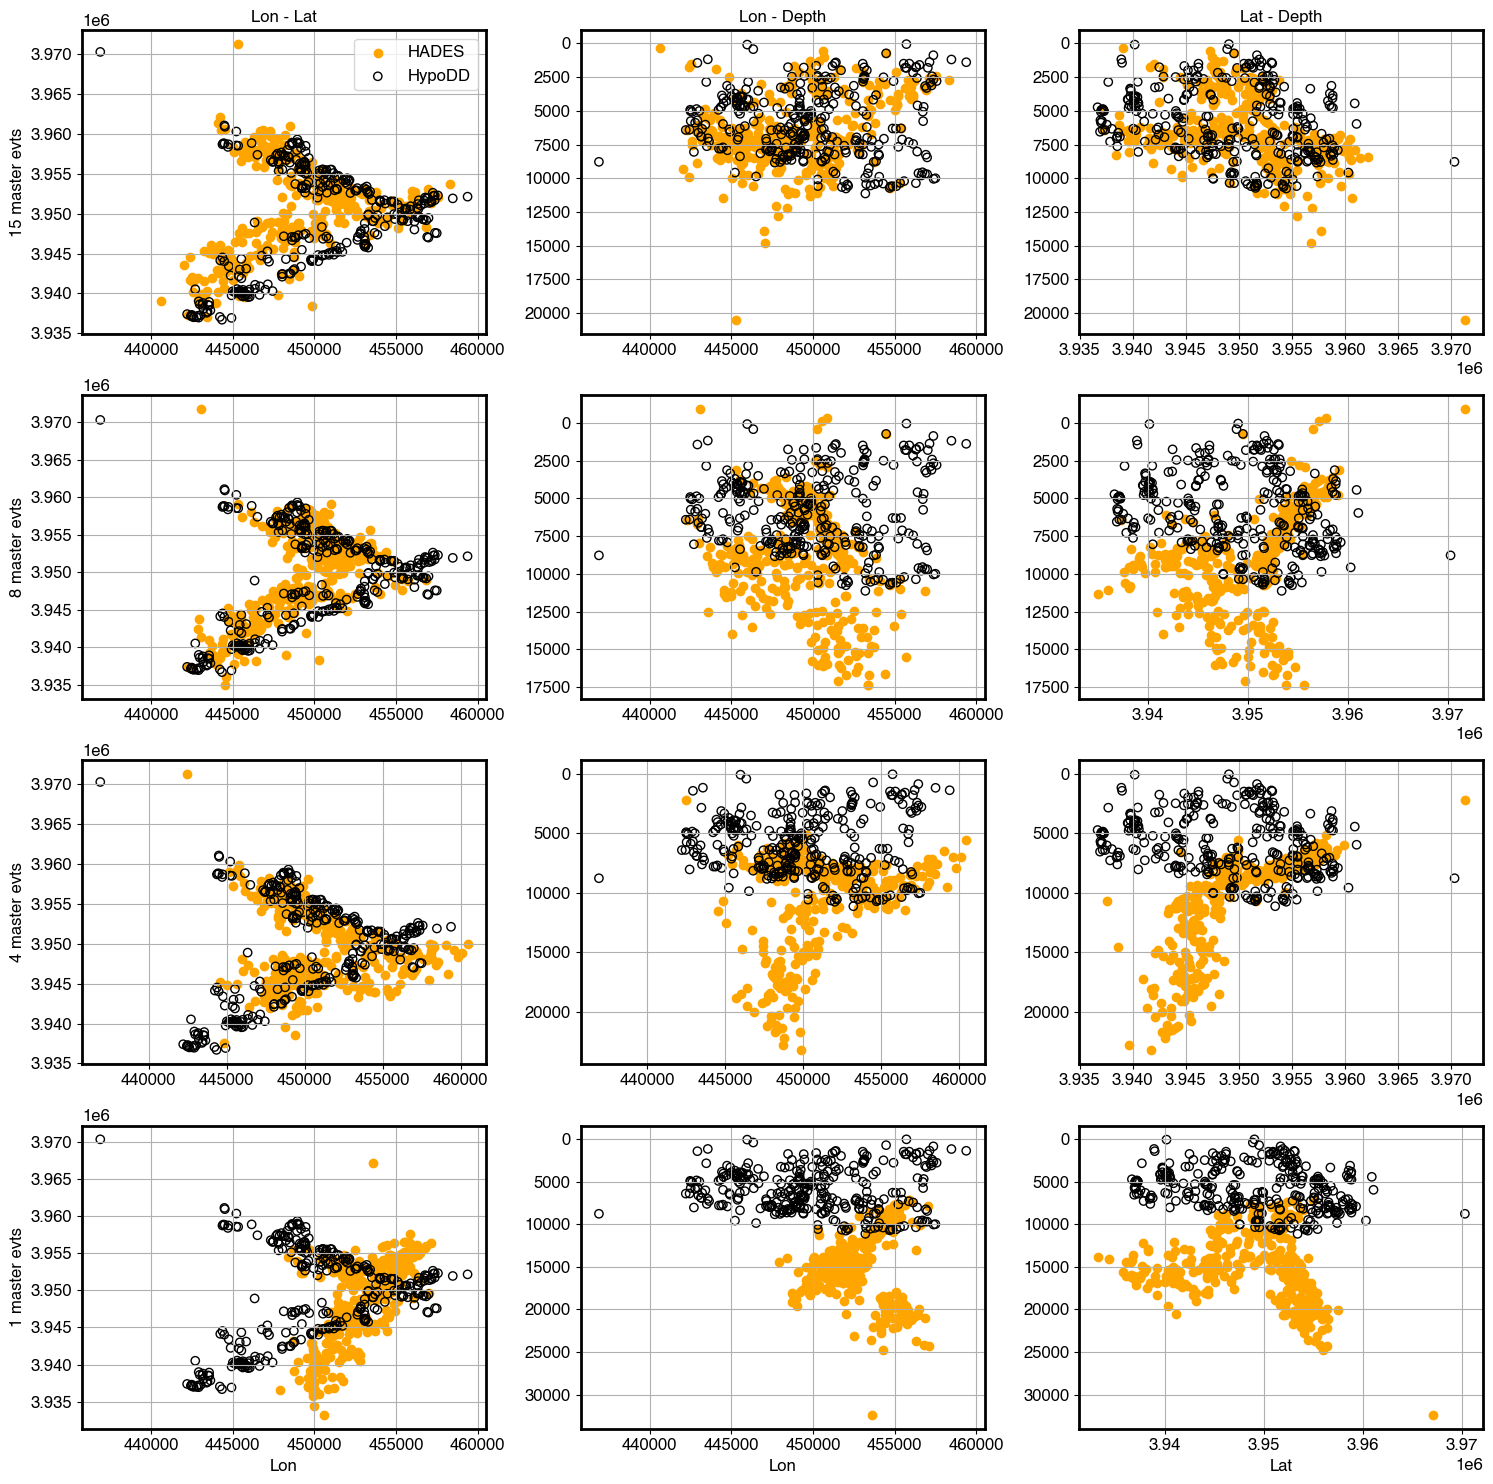

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,15))

loclist = [locs_15, locs_8, locs_4, locs_1]

for i in range(len(loclist)):

    axes[i,0].grid()
    axes[i,0].scatter(loclist[i][:,0], loclist[i][:,1], c='orange', label='HADES')
    axes[i,0].scatter(hypoDD_locs[:,0], hypoDD_locs[:,1], label='HypoDD', facecolor='None', edgecolor='k')

    axes[i,1].grid()
    axes[i,1].scatter(loclist[i][:,0], loclist[i][:,2], c='orange')
    axes[i,1].scatter(hypoDD_locs[:,0], hypoDD_locs[:,2], label='HypoDD', facecolor='None', edgecolor='k')
    axes[i,1].invert_yaxis()

    axes[i,2].grid()
    axes[i,2].scatter(loclist[i][:,1], loclist[i][:,2], c='orange', label='HADES')
    axes[i,2].scatter(hypoDD_locs[:,1], hypoDD_locs[:,2], label='HypoDD', facecolor='None', edgecolor='k')
    axes[i,2].invert_yaxis()

axes[0,0].set_title('Lon - Lat', fontsize=12)
axes[0,1].set_title('Lon - Depth', fontsize=12)
axes[0,2].set_title('Lat - Depth', fontsize=12)

axes[0,0].set_ylabel('15 master evts', fontsize=12)
axes[1,0].set_ylabel('8 master evts', fontsize=12)
axes[2,0].set_ylabel('4 master evts', fontsize=12)
axes[3,0].set_ylabel('1 master evts', fontsize=12)

axes[3,0].set_xlabel('Lon')
axes[3,1].set_xlabel('Lon')
axes[3,2].set_xlabel('Lat')

axes[0,0].legend(loc='upper right', fontsize=12)

fig.tight_layout()
# fig.savefig('./ridgecrest_all.png', dpi=600)
plt.show()


### Discussions

As we see, for ridgecrest the absolute locations deteriorate as we decrease the number of reference events. However, if you take a close look at the image above, it seems like the versions with a lower amount of reference events are just rotated, and not necessarily a wrong shape. A way to check if rotation (or even shape) are reasonable is the rectilinearity value, or you can have a look at our problem by plotting the (ts-tp) onto the results:

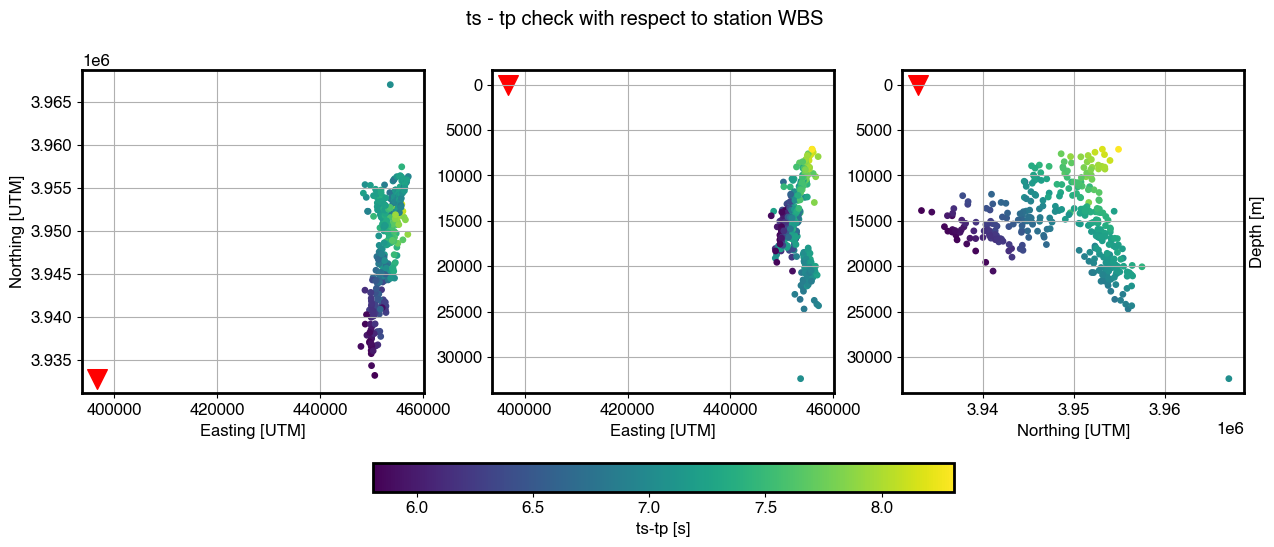

In [91]:
# Let's take a closer look

#### Which results do you want to take a closer look at? ##################
look = locs_1                           # locs_15, locs_8, locs_4, locs_1
stations = hobj_1.stations.copy()       # hobj_15, hobj_8, hobj_4, hobj_1 
stat_choice = 'WBS' # 'WBS' or 'WMF'
###########################################################################



#------------------------------------------------------------------------------------------------#
evtsps = np.array(hloc_1.evtsps.copy()[stat_choice])

fig, ax = plt.subplots(1,3, figsize=(15,6))

ax[0].grid()
ax[0].scatter(look[:,0], look[:,1], s=15, c=evtsps, cmap='viridis')
ax[0].scatter(stations[stat_choice][0]+origin_UTM[0], stations[stat_choice][1]+origin_UTM[1],
                marker='v', s=200, c='r')
ax[0].set_xlabel('Easting [UTM]')
ax[0].set_ylabel('Northing [UTM]')


ax[1].grid()
ax[1].scatter(look[:,0], look[:,2], s=15, c=evtsps, cmap='viridis')
ax[1].scatter(stations[stat_choice][0]+origin_UTM[0], stations[stat_choice][2],
                marker='v', s=200, c='r')
ax[1].invert_yaxis()
ax[1].set_xlabel('Easting [UTM]')

ax[2].grid()
im=ax[2].scatter(look[:,1], look[:,2], s=15, c=evtsps, cmap='viridis')
ax[2].scatter(stations[stat_choice][1]+origin_UTM[1], stations[stat_choice][2],
                marker='v', s=200, c='r')
ax[2].invert_yaxis()
ax[2].set_xlabel('Northing [UTM]')
ax[2].set_ylabel('Depth [m]')
ax[2].yaxis.set_label_position('right')

plt.colorbar(im, ax=ax[:], shrink=.5, label='ts-tp [s]', orientation='horizontal')
plt.suptitle(f'ts - tp check with respect to station {stat_choice}')

# plt.tight_layout()
plt.show()

# Conclusion

As you can see, the distribution of the $t_s - t_p$ follows a nice trend through the cluster, and is not randomly distributed. Randomly distributed $t_s - t_p$ would indicate that the relative distances within the cluster are wrong. 

However, if you take a closer look at these figures and the rectilinearity figures that were automatically generated before, you will see that the traveltime trend is not always perfectly aligned with the distance. We can use this to manually tweek the results still.

>The rotation is automated in the one-master event case, but the programme will not always find the perfect rotation since this is a non-linear process and highly iterative. In the next notebook `ridgecrest_example_part2.ipynb` you will find how we can manually rotate our results further so that we can fine-tune it as best we can.

In [92]:
from hades_rotation import Cluster
import rotations_utils  as ru

from scipy.spatial.transform import Rotation as R
from rotations_utils import define_axis_vectors

def z_quat(theta, v0):
  """Takes the first angle theta and computes the quaternion around axis v0."""

  v0 = v0

  r_a = R.from_quat([v0[0] * np.sin(theta/2),     # compute quaternions
                              v0[1] * np.sin(theta/2), 
                              v0[2] * np.sin(theta/2), 
                              np.cos(theta/2) ])

  return r_a


def a_quat(theta, v1):
    """Takes the second angle theta and computes the quaternion around axis v0."""

    v1 = v1

    r_b = R.from_quat([v1[0] * np.sin(theta/2),     # compute quaternions
                                v1[1] * np.sin(theta/2), 
                                v1[2] * np.sin(theta/2), 
                                np.cos(theta/2) ])

    return r_b


def b_quat(theta, v2):

    v2 = v2

    r_c = R.from_quat([v2[0] * np.sin(theta/2),     # compute quaternions
                                v2[1] * np.sin(theta/2), 
                                v2[2] * np.sin(theta/2), 
                                np.cos(theta/2) ])

    return r_c
def invert_rotations_spatial(cluster, rotations, station, bary):
    """
    Inverts the rotation
    """

    bary = bary
    v0, v1, v2 = define_axis_vectors(station, bary)

    ca = b_quat(np.radians(rotations[2]), v2).inv().apply(cluster - bary) 
    cb = a_quat(np.radians(rotations[1]), v1).inv().apply(ca ) 
    cF = z_quat(np.radians(rotations[0]), v0).inv().apply(cb ) + bary
    
    

    return cF


In [93]:
origin = hloc_1.input.origin
origin_UTM = np.array(LLtoUTM(23, origin[0], origin[1])[1:])

locs_1 = hloc_1.locations.copy()
locs_1[:,0] = locs_1[:,0] + origin_UTM[0]
locs_1[:,1] = locs_1[:,1] + origin_UTM[1]

bary, v0, v1, v2, cluster_opt, dtps_obs, stavect = ru.setup(optall=True, master_evts=np.array([0,3,6,8]),cluster=None, dtps_obs=np.array([hloc_1.evtsps.copy()['WBS'], np.array(hloc_1.evtsps.copy()['WMF'])]), 
                cluster_rot=locs_1, stations=np.array([stations['WBS'], stations['WMF']]), station_axis=1, vs=Vs, vp=Vp, baryp=locs_1[0,:])

#------------------------#
Your choices:
#------------------------#
Station [-31945.96486638  46408.65831195      0.        ] chosen as axis station
Optall = True, use all cluster events for rotation finder


In [104]:
instance_cluster = Cluster(cluster=locs_1, axis=0, stations=np.array([stations['WBS'], stations['WMF']]),
            bary=bary, subcluster=locs_1, vs=Vs, vp=Vp, dtps_org=np.array([hloc_1.evtsps.copy()['WBS'], np.array(hloc_1.evtsps.copy()['WMF'])]), cluster_true=hypoDD_locs)

BEST PARAMETERS
      fun: 1363962887.6864858
 message: 'Optimization terminated successfully.'
    nfev: 36534
     nit: 809
 success: True
       x: array([110.73163542, 258.19090641, 311.28410709])
thetas [110.73163542 258.19090641 311.28410709]
[110.73163542 258.19090641 311.28410709]


---------------------------------------
Final rectilinearity: 1363962887.6864858
---------------------------------------


absolute RMS [m] 216424.93581803667


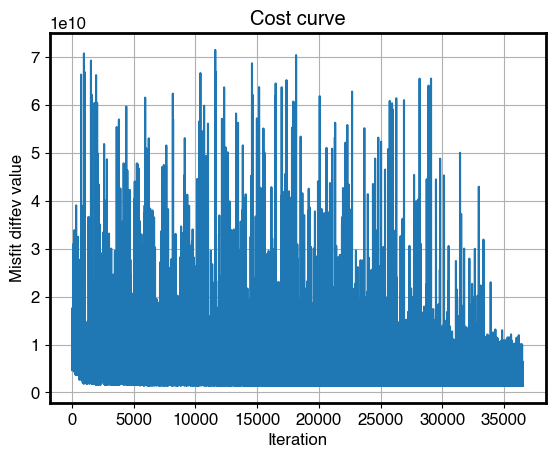

In [105]:
test_thetas = instance_cluster.optimize_rotations(prior=[0.,0.,0.], method='diffev', optall=True)

In [106]:
cluster_comp = invert_rotations_spatial(locs_1, test_thetas, stations['WBS'], bary)

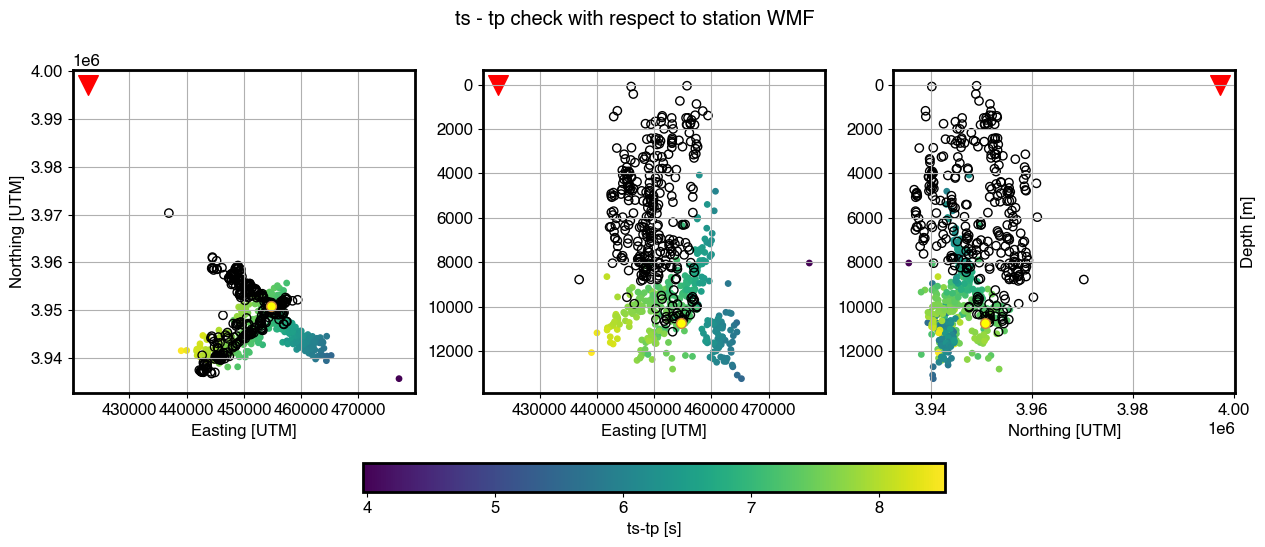

In [107]:
# Let's take a closer look

#### Which results do you want to take a closer look at? ##################
look = locs_1                           # locs_15, locs_8, locs_4, locs_1
stations = hobj_1.stations.copy()       # hobj_15, hobj_8, hobj_4, hobj_1 
stat_choice = 'WMF' # 'WBS' or 'WMF'
###########################################################################



#------------------------------------------------------------------------------------------------#
evtsps = np.array(hloc_1.evtsps.copy()[stat_choice])

fig, ax = plt.subplots(1,3, figsize=(15,6))

ax[0].grid()
ax[0].scatter(cluster_comp[:,0], cluster_comp[:,1], s=15, c=evtsps, cmap='viridis')
ax[0].scatter(stations[stat_choice][0]+origin_UTM[0], stations[stat_choice][1]+origin_UTM[1],
                marker='v', s=200, c='r')
ax[0].scatter(hypoDD_locs[:,0], hypoDD_locs[:,1], label='HypoDD', facecolor='None', edgecolor='k')
ax[0].scatter(bary[0], bary[1], s=50, facecolor='yellow', edgecolor='Peru')

ax[0].set_xlabel('Easting [UTM]')
ax[0].set_ylabel('Northing [UTM]')


ax[1].grid()
ax[1].scatter(cluster_comp[:,0], cluster_comp[:,2], s=15, c=evtsps, cmap='viridis')
ax[1].scatter(stations[stat_choice][0]+origin_UTM[0], stations[stat_choice][2],
                marker='v', s=200, c='r')
ax[1].scatter(hypoDD_locs[:,0], hypoDD_locs[:,2], label='HypoDD', facecolor='None', edgecolor='k')
ax[1].scatter(bary[0], bary[2], s=50, facecolor='yellow', edgecolor='Peru')

ax[1].invert_yaxis()
ax[1].set_xlabel('Easting [UTM]')

ax[2].grid()
im=ax[2].scatter(cluster_comp[:,1], cluster_comp[:,2], s=15, c=evtsps, cmap='viridis')
ax[2].scatter(stations[stat_choice][1]+origin_UTM[1], stations[stat_choice][2],
                marker='v', s=200, c='r')
ax[2].scatter(hypoDD_locs[:,1], hypoDD_locs[:,2], label='HypoDD', facecolor='None', edgecolor='k')
ax[2].scatter(bary[1], bary[2], s=50, facecolor='yellow', edgecolor='Peru')
# ax[2].scatter(cluster_comp[ma])

ax[2].invert_yaxis()
ax[2].set_xlabel('Northing [UTM]')
ax[2].set_ylabel('Depth [m]')
ax[2].yaxis.set_label_position('right')

plt.colorbar(im, ax=ax[:], shrink=.5, label='ts-tp [s]', orientation='horizontal')
plt.suptitle(f'ts - tp check with respect to station {stat_choice}')

# plt.tight_layout()
plt.show()

15075608.243834365 0.04112514013241547
15032062.69515357 0.47700238919323745


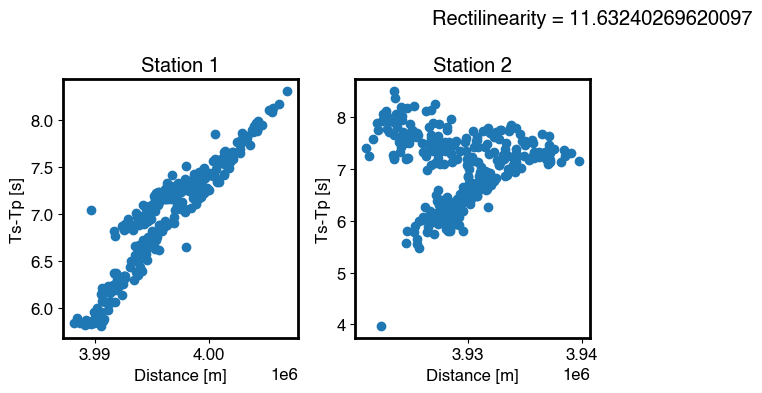

----------------------------
Rectilinearity =  11.63240269620097
----------------------------


11.63240269620097

In [108]:
ru.pca_theta_calculation(cluster_comp, np.array([hloc_1.evtsps.copy()['WBS'], np.array(hloc_1.evtsps.copy()['WMF'])]).T, np.array([stations['WBS'], stations['WMF']]), plot=True)

In [113]:
instance_cluster.best_params

     fun: 1363962887.6864858
 message: 'Optimization terminated successfully.'
    nfev: 36534
     nit: 809
 success: True
       x: array([110.73163542, 258.19090641, 311.28410709])